# Analysis of Airbnb open data

## Introduction

In this notebook I want to understand if there is any difference in the behavior of airbnb rentals between 2 very touristic but at the same very time different cities:
<ul>
<li>New York and</li>
<li>Barcelona.</li>
</ul>

The info from both cities came from the page of [inside airbnb](http://insideairbnb.com/get-the-data/)

## Questions to Answer

To compare these cities, I will like to answer the following questions:
<ul>
<li>Is there a price difference between the rental prices? or the type of rooms that are rented?</li>
<li>Is there a difference in the rental strategy that hosts in these cities should use?</li>
</ul>

## Downloading libraries

I will start by downloading and installing the libraries that I will use

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [33]:
!pip install folium
import folium

## Dowloading & understanding the data

As step number 2, I will download the information from both cities, and I will begin to compare the structure of the information to see if they are similar and therefore comparable.

From now on, all information beginning with ny will refer to New York, while all information beginning with bcn will refer to Barcelona.

In [34]:
nybnb = pd.read_csv('data/nylistings.csv',encoding='latin-1')
bcnbnb = pd.read_csv('data/bcnlistings.csv',encoding='latin-1')

In [35]:
#Previewing the info.
nybnb.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73777,-73.95366,Hotel room,308,2,42,2022-07-18,0.3,30,217,4,NaN


In [36]:
# Checking the columns on nybnb
nybnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [37]:
#Checking the rows on nybnb
len(nybnb)

39881

In [38]:
bcnbnb.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,HabitaciÃ³n muy acogedora.,51421682,Maria Das Merces,Sants-MontjuÃ¯c,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.0,1,351,9,Exempt


In [39]:
#Checking the columns on bcnbnb
bcnbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [40]:
#Checking the rows on bcnbnb
len(bcnbnb)

16920

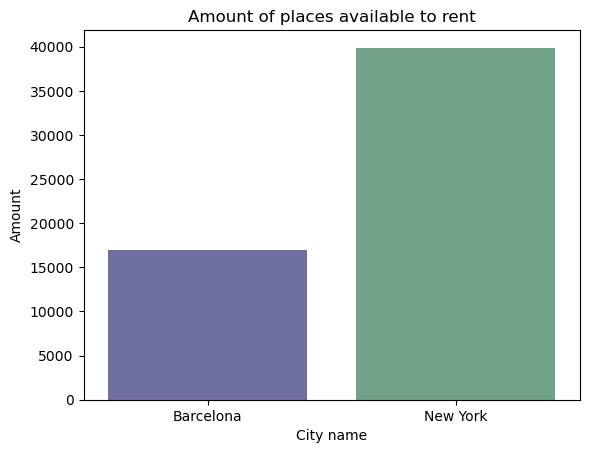

In [41]:
import matplotlib.colors as mcolors

x=["Barcelona","New York"]
y=[len(bcnbnb),len(nybnb)]
colors=["#6667AB", "#66ab87"]
rgb_colors = [mcolors.to_rgba(color) for color in colors]
sns.barplot(x=x, y=y, palette=rgb_colors)
plt.title("Amount of places available to rent")
plt.xlabel("City name")
plt.ylabel("Amount")
plt.show()


As we can see, both cities have the same type of information but **New York has more than twice as many places to book** than Barcelona. There are 75 columns on each table, but they seem to be same, let´s check if they are:

In [42]:
nycol=nybnb.columns
print(nycol)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [43]:
bcncol=bcnbnb.columns
print(bcncol)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [44]:
#Checking of nycol is equal to bcncol
print(nycol.equals(bcncol))

True


## Understadning, Wrangling and Cleaning Data

Now that we know that the cities are comparable, let's begin to analyze the information for each one. I will start with New York, then, I will see the information of Barcelona and I will finish this section comparing the information found.

Since the tables have too many columns, I would like to see the list of columns to select only those which I am interested to work with.

In [45]:
nybnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39881 non-null  int64  
 1   name                            39868 non-null  object 
 2   host_id                         39881 non-null  int64  
 3   host_name                       39831 non-null  object 
 4   neighbourhood_group             39881 non-null  object 
 5   neighbourhood                   39881 non-null  object 
 6   latitude                        39881 non-null  float64
 7   longitude                       39881 non-null  float64
 8   room_type                       39881 non-null  object 
 9   price                           39881 non-null  int64  
 10  minimum_nights                  39881 non-null  int64  
 11  number_of_reviews               39881 non-null  int64  
 12  last_review                     

In [46]:
nybnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.988100e+04,3.988100e+04,39881.000000,39881.000000,39881.000000,39881.000000,39881.000000,31519.000000,39881.000000,39881.000000,39881.000000
mean,1.162303e+17,1.313420e+08,40.728870,-73.945665,197.547228,19.131742,26.690855,1.244733,16.931396,131.535669,7.754344
std,2.465197e+17,1.455674e+08,0.058623,0.057870,353.332542,31.432778,56.256044,1.991702,59.597136,138.539399,18.784149
min,2.539000e+03,2.438000e+03,40.500314,-74.269520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.633197e+07,1.363938e+07,40.687760,-73.983340,80.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,3.823683e+07,5.974663e+07,40.724545,-73.953710,130.000000,14.000000,5.000000,0.560000,1.000000,75.000000,1.000000
75%,5.255780e+07,2.233746e+08,40.763200,-73.925600,219.000000,30.000000,25.000000,1.790000,4.000000,277.000000,7.000000
max,7.098549e+17,4.782606e+08,40.928810,-73.690060,16500.000000,1250.000000,1480.000000,123.000000,453.000000,365.000000,949.000000


In [47]:
bcnbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.692000e+04,1.692000e+04,16920.000000,16920.000000,16920.000000,16920.000000,16920.000000,13306.000000,16920.000000,16920.000000,16920.000000
mean,1.146584e+17,1.380431e+08,41.391507,2.165119,172.914775,13.270449,41.029137,1.415639,19.506619,170.815012,11.112234
std,2.457373e+17,1.448829e+08,0.016357,0.022847,927.545812,30.233280,77.338621,1.790187,35.142606,132.341829,21.965633
min,1.867400e+04,3.073000e+03,41.319310,2.045080,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.842040e+07,9.667715e+06,41.379995,2.155090,50.000000,1.000000,1.000000,0.250000,1.000000,39.000000,0.000000
50%,3.590547e+07,7.828806e+07,41.389200,2.167215,100.000000,3.000000,7.000000,0.890000,4.000000,164.000000,2.000000
75%,5.127296e+07,2.453892e+08,41.401580,2.177470,191.000000,31.000000,44.000000,2.030000,20.000000,308.000000,15.000000
max,7.127703e+17,4.785737e+08,41.479980,2.232090,90000.000000,1124.000000,1311.000000,56.130000,161.000000,365.000000,832.000000


By looking at both tables it migth be hard to see the differences, so let´s condense this info into plots. 

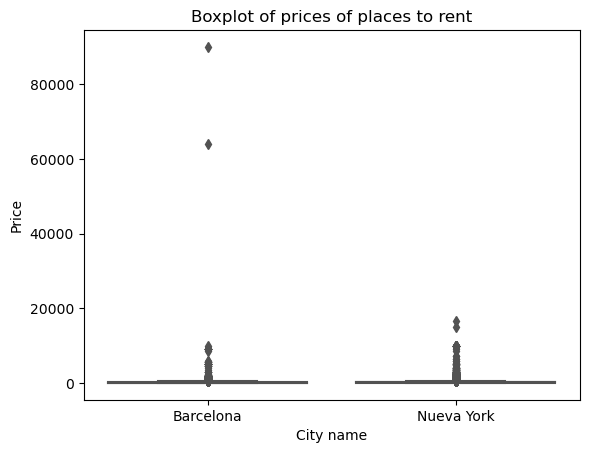

In [58]:
price = pd.concat([bcnbnb['price'], nybnb['price']], axis=1)
price.columns = ['Barcelona', 'Nueva York'] 
price_melted = price.melt(var_name='City', value_name='Price')

colors=["#6667AB", "#66ab87"]
rgb_colors = [mcolors.to_rgba(color) for color in colors]
sns.boxplot(data=price_melted, x='City', y='Price', palette=rgb_colors)
plt.title("Boxplot of prices of places to rent")
plt.xlabel("City name")
plt.ylabel("Price")
plt.show()

It seems that there is a lot of difference between the maximum prices and the rest of the rents, so it is not possible to understand the behavior of most of the rents with this graph. However, this graph allows us to see that the maximum price in Barcelona is much higher than the maximum in New York.

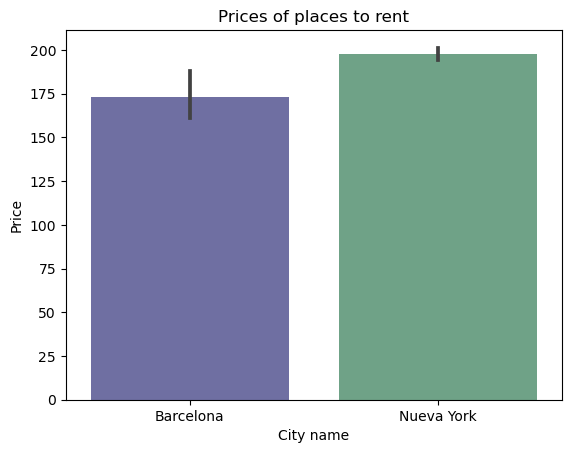

In [64]:
price = pd.concat([bcnbnb['price'], nybnb['price']], axis=1)
price.columns = ['Barcelona', 'Nueva York'] 
price_melted = price.melt(var_name='City', value_name='Price')

colors=["#6667AB", "#66ab87"]
rgb_colors = [mcolors.to_rgba(color) for color in colors]
sns.barplot(data=price_melted, x='City', y='Price', palette=rgb_colors)
plt.title("Prices of places to rent")
plt.xlabel("City name")
plt.ylabel("Price")
plt.show()

Here we can see that the **rental price tends to be lower in Barcelona than in New York**. Now that we understand the price, let's see if there is any difference in the minimum rental nights condition.

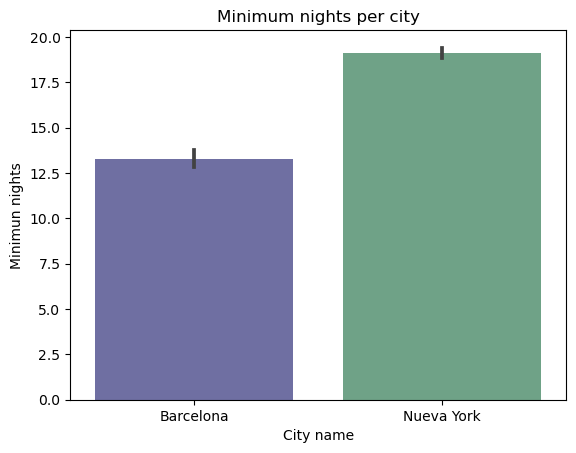

In [67]:
nights = pd.concat([bcnbnb['minimum_nights'], nybnb['minimum_nights']], axis=1)
nights.columns = ['Barcelona', 'Nueva York'] 
nights_melted = price.melt(var_name='City', value_name='Price')

colors=["#6667AB", "#66ab87"]
rgb_colors = [mcolors.to_rgba(color) for color in colors]
sns.barplot(data=nights_melted, x='City', y='Price', palette=rgb_colors)
plt.title("Minimum nights per city")
plt.xlabel("City name")
plt.ylabel("Minimun nights")
plt.show()

As we can see **in Barcelona** the owners of Airbnb **tend to request less days on minimun nights**. Finally, let's see another element that airbnb users tend to use, such as the number of reviews.

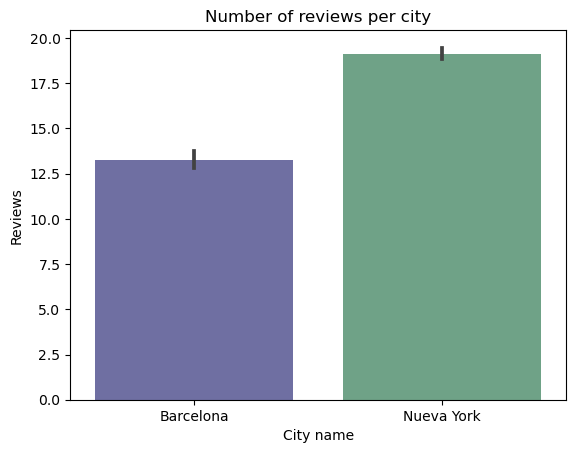

In [69]:
reviews = pd.concat([bcnbnb['number_of_reviews'], nybnb['number_of_reviews']], axis=1)
reviews.columns = ['Barcelona', 'Nueva York'] 
reviews_melted = price.melt(var_name='City', value_name='Reviews')

colors=["#6667AB", "#66ab87"]
rgb_colors = [mcolors.to_rgba(color) for color in colors]
sns.barplot(data=reviews_melted, x='City', y='Reviews', palette=rgb_colors)
plt.title("Number of reviews per city")
plt.xlabel("City name")
plt.ylabel("Reviews")
plt.show()

And as we can see, airbnbs tend to have fewer reviews in Barcelona than in New York.

We can begin to draw some initial conclusions, these are:
<ul>
<li>The average price per night in Barcelona is 100 while in New York it is 130, however the highest price in BCN is 90000 while in NY it is 16500</li>
<li>The average minimum number of nights is close on both cities, in Barcelona is 13 while in New York it is 19</li>
<li>In Barcelona the average number of reviews is 7 while in NY it is 5</li>   
</ul>

Now I would like to know what type of rooms are being rented

In [73]:
nybnb['room_type'].unique()

array(['Hotel room', 'Private room', 'Entire home/apt', 'Shared room'],
      dtype=object)

In [74]:
bcnbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

It seems that in both cities the **same type of rooms are being rented**.

In both cities it is expensive to buy homes, so I would like to know what kind of people are placing their ads on airbnb. For this, I am going to classify the people who advertise into 2 types: the hosts that only have one rental ad, and the hots that have several rental ads. I make this separation by assuming that hosts who rent multiple houses are actually rental companies, while hosts who rent one house are people.

In [75]:
ny_host=nybnb['host_id'].count()
print(ny_host)

39881


In [76]:
ny_uni_host=nybnb['host_id'].nunique()
print(ny_uni_host)

26292


In [77]:
print(nybnb['host_id'].value_counts().head())

107434423    453
3223938      288
158969505    200
19303369     175
200239515    158
Name: host_id, dtype: int64


In [78]:
ny_1_host=sum(nybnb['host_id'].value_counts()==1)
print(ny_1_host)

21724


In [79]:
ny_p_host=((ny_1_host/ny_host)*100)
print(ny_p_host)

54.47205436172613


In [80]:
bcn_host=bcnbnb['host_id'].count()
print(bcn_host)

16920


In [81]:
bcn_uni_host=bcnbnb['host_id'].nunique()
print(ny_uni_host)

26292


In [82]:
print(bcnbnb['host_id'].value_counts().head())

4459553      161
346367515    155
158023606    139
1447144      127
32037490     127
Name: host_id, dtype: int64


In [83]:
bcn_1_host=sum(bcnbnb['host_id'].value_counts()==1)
print(bcn_1_host)

4978


In [84]:
bcn_p_host=((bcn_1_host/bcn_host)*100)
print(bcn_p_host)

29.42080378250591


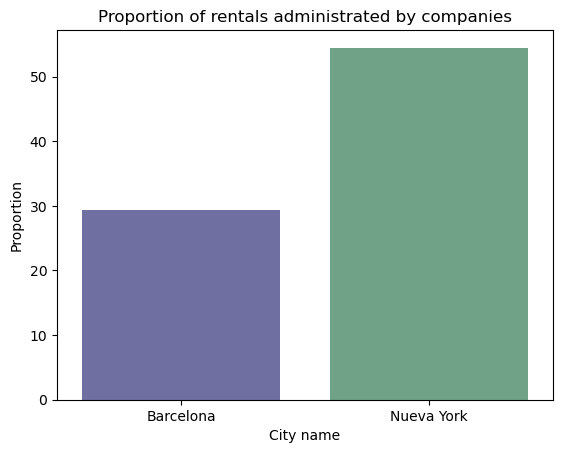

In [89]:
proportion = [bcn_p_host, ny_p_host]
cities = ['Barcelona', 'Nueva York']

reviews_df = pd.DataFrame({'City': cities, 'Proportion': proportion})

colors=["#6667AB", "#66ab87"]
rgb_colors = [mcolors.to_rgba(color) for color in colors]

sns.barplot(data=reviews_df, x='City', y='Proportion', palette=rgb_colors)
plt.title("Proportion of rentals administrated by companies")
plt.xlabel("City name")
plt.ylabel("Proportion")
plt.show()


**Airbnb rentals seem to be mostly managed by companies in Barcelona** (2 out of 3 rentals seem to be managed by companies) **while in New York it is a little less than half**. With the information that I have, I cannot know why this situation occurs, but here is an indication that if someone wants to put a home up for rent in Barcelona, it is best to have it managed by a company.

Now I would like to review the rental neighbourhoods. Once again, I will first review the information from New York first and then from Barcelona. 

In [91]:
print(nybnb['neighbourhood_group'].value_counts().head())

Manhattan        16847
Brooklyn         14845
Queens            6175
Bronx             1568
Staten Island      446
Name: neighbourhood_group, dtype: int64


In [92]:
print(nybnb['neighbourhood_group'].value_counts().tail())

Manhattan        16847
Brooklyn         14845
Queens            6175
Bronx             1568
Staten Island      446
Name: neighbourhood_group, dtype: int64


In [93]:
ny_uni_hood=nybnb['neighbourhood_group'].nunique()
print(ny_uni_hood)

5


In [94]:
print(bcnbnb['neighbourhood_group'].value_counts().head())

Eixample           5692
Ciutat Vella       3554
Sants-MontjuÃ¯c    2146
Sant MartÃ­        1640
GrÃ cia            1420
Name: neighbourhood_group, dtype: int64


In [95]:
print(bcnbnb['neighbourhood_group'].value_counts().tail())

Les Corts               755
SarriÃ -Sant Gervasi    725
Horta-GuinardÃ³         439
Sant Andreu             360
Nou Barris              189
Name: neighbourhood_group, dtype: int64


In [96]:
bcn_uni_hood=bcnbnb['neighbourhood_group'].nunique()
print(bcn_uni_hood)

10


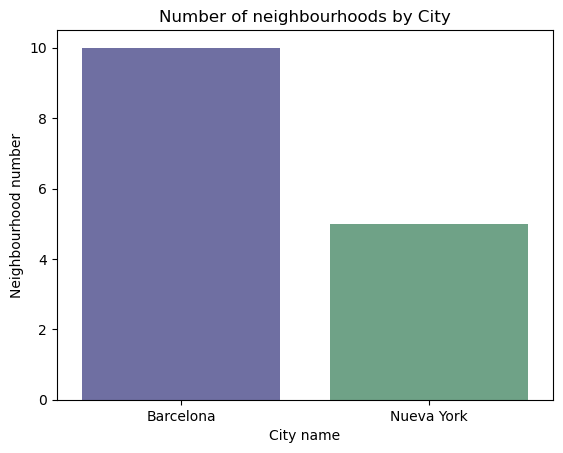

In [98]:
proportion = [bcn_uni_hood, ny_uni_hood]
cities = ['Barcelona', 'Nueva York']

reviews_df = pd.DataFrame({'City': cities, 'Proportion': proportion})

colors=["#6667AB", "#66ab87"]
rgb_colors = [mcolors.to_rgba(color) for color in colors]

sns.barplot(data=reviews_df, x='City', y='Proportion', palette=rgb_colors)
plt.title("Number of neighbourhoods by City")
plt.xlabel("City name")
plt.ylabel("Neighbourhood number")
plt.show()

Despite the fact that Barcelona has a greater breakdown of residential areas, we can see that it has a similar behavior to New York, since both cities seem to have the highest number of rentals in their tourist areas. If this second part of the statement is not very clear, you can check the section "Exploring and Visualizing Data" a little further down.

Now let's see how the zones are separated by prices

In [99]:
nybnb.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            124.737245
Brooklyn         157.927114
Manhattan        264.933341
Queens           131.365506
Staten Island    143.163677
Name: price, dtype: float64

In [100]:
bcnbnb.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Ciutat Vella            137.059932
Eixample                212.082045
GrÃ cia                 134.326761
Horta-GuinardÃ³         252.250569
Les Corts               229.988079
Nou Barris               66.375661
Sant Andreu             110.316667
Sant MartÃ­             150.015244
Sants-MontjuÃ¯c         155.918453
SarriÃ -Sant Gervasi    170.245517
Name: price, dtype: float64

As we can see, in New York the most expensive area is Manhattan and the other 4 maintain relatively similar prices, so if you want **to find a good value** for money when it comes to getting to know the city, **perhaps it is enough to find a place in Brooklyn. Something similar seems to happen in Barcelona**, areas that exceed 200 dollars are areas with high tourist interest, and prices drop as tourist interest decreases, **however Barcelona has an advantage over New York** and that is that **it has a good public transport system**, this allows for example one to stay in Nou Barris without making it more difficult to access points of interest.

## Exploring and Visualizing Data

Let's see how this numerical information looks on the city maps. For this, we will use heatmaps

In [36]:
from folium.plugins import HeatMap

Now let's see the behavior of New York

In [37]:
nysublist=nybnb.dropna(subset=['latitude', 'longitude','price'])
nysublist.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73777,-73.95366,Hotel room,308,2,42,2022-07-18,0.3,30,217,4,NaN


In [38]:
nymap=folium.Map(location=[40.73777, -73.95366],
                tiles='CartoDB positron',
                zoom_start=10)
nymap.add_child(HeatMap(nysublist[['latitude', 'longitude','price']],
                      radius=5,
                      min_opacity=2,
                      blur=8,
                      overlay=True
                      )
              )

By zooming in on the map, we can see that even the island of Manhattan has low rents, which makes us think that if we make a good deal we could get a low rent in the area, however it is important to remember that many rentals in the city are made by people and if we want to make sure that the person who rents us is serious, it is more difficult to get information from a person than from a company.

Now let's see Barcelona

In [39]:
bcnsublist=bcnbnb.dropna(subset=['latitude', 'longitude','price'])
bcnsublist.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,673276379194656210,HabitaciÃ³n muy acogedora.,51421682,Maria Das Merces,Sants-MontjuÃ¯c,la Bordeta,41.363004,2.125326,Private room,59,1,9,2022-09-08,9.0,1,351,9,Exempt


In [40]:
map1=folium.Map(location=[41.363004, 2.125326],
                tiles='CartoDB positron',
                zoom_start=10)
map1.add_child(HeatMap(bcnsublist[['latitude', 'longitude','price']],
                      radius=5,
                      min_opacity=2,
                      blur=8,
                      overlay=True
                      )
              )

As in New York, here we can see that the average price of the most expensive areas also has a lot of offer, and therefore it is also possible to get cheap rentals in cheap rental areas. The issue is knowing how to filter the information and rent it to someone serious. In the case of Barcelona, I would give more priority to the level of responsibility of the host than the location, because as I said before, it is relatively easy and cheap to move around the city.

## Conclusions

As a conclusion to the analysis, I can conclude that both cities, despite being on different continents, have quite similar characteristics: rental prices are similar, as the offer of places to rentand in both cases the offer is conditioned by the existence of Tourist places. Therefore, a tourist who has the same budget to go to Barcelona or New York will have to spend a similar amount of money for a stay.

In the case of a person who wants to become a host in New York, they will compete equally with people and with companies, while in Barcelona most of their competitors will be companies, this can make rental management more optimized in Barcelona.

In general terms, I can say that according to the information analyzed, Barcelona is more professional tourist sourced than New York. This is reflected in the number of rentals managed by companies, and other characteristics of the city such as its public transportation system and its variety of tourist places and events.